In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

sns.set_palette("tab10") # set color palette for seaborn

# stuff to make get request
import urllib.request
import json

def getResponse(url):
    operUrl = urllib.request.urlopen(url)
    if(operUrl.getcode()==200):
        data = operUrl.read()
        jsonData = json.loads(data)
    else:
        print("Error receiving data", operUrl.getcode())
    return jsonData

In [2]:
# make json request to get bike counts
json_data = getResponse("http://www.eco-public.com/api/cw6Xk4jW4X4R/data/periode/100117730?begin=20141217&end=20190703&step=4")

In [3]:
# get bicycle counts into dataframe
counts = pd.DataFrame.from_dict(json_data, orient='columns')
counts['Date'] = pd.DatetimeIndex(counts['date'])

daily = counts[['Date', 'comptage']]
daily.set_index('Date', inplace=True)
daily.columns = ['Total']

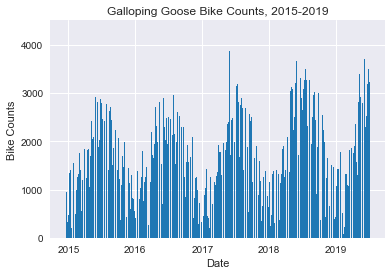

In [4]:
# take a look at counts
import matplotlib.dates as mdates
#df_2019 = daily.loc['2019-01-01':'2019-06-30']

# create the plot space upon which to plot the data
fig, ax= plt.subplots()

# add the x-axis and the y-axis to the plot
ax.bar(daily.index.values, 
        daily['Total'])

# format the ticks
years = mdates.YearLocator()   # every year
years_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Bike Counts",
       title="Galloping Goose Bike Counts, 2015-2019");

In [5]:
# turn off warning because it's annoying
pd.set_option('mode.chained_assignment', None)

# add binary columns for day of the week
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
#daily.index.dayofweek
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [6]:
from datetime import date 
import holidays 

# Select country 
ca_holidays = holidays.Canada(years=[2015, 2016, 2017, 2018, 2019]) 
holiday_dates = pd.DatetimeIndex(ca_holidays.keys())

# create holiday indicator variable and join to daily bike data
daily = daily.join(pd.Series(1, index=holiday_dates, name='holiday')) # if holiday, code as 1
daily['holiday'].fillna(0, inplace=True) # if NaN, code as 0

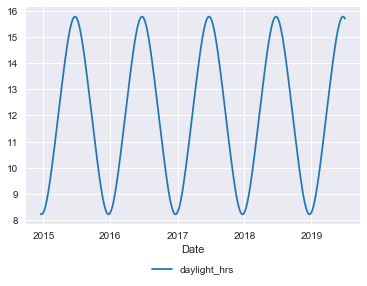

In [7]:
# add variable for hours of daylight
# this fn is taken from Python Data Science Handbook
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude)) * 
         np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25))
        )
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
#date = pd.datetime(2019, 7, 8)
#hours_of_daylight(date)
daily[['daylight_hrs']].plot()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5);

In [8]:
# import weather data
weather2015 = pd.read_csv('data/weather2015.csv', skiprows=24, index_col='Date/Time', parse_dates=True)
weather2016 = pd.read_csv('data/weather2016.csv', skiprows=24, index_col='Date/Time', parse_dates=True)
weather2017 = pd.read_csv('data/weather2017.csv', skiprows=24, index_col='Date/Time', parse_dates=True)
weather2018 = pd.read_csv('data/weather2018.csv', skiprows=24, index_col='Date/Time', parse_dates=True)
weather2019 = pd.read_csv('data/weather2019.csv', skiprows=24, index_col='Date/Time', parse_dates=True)

In [23]:
weather = weather2015.append(weather2016, ignore_index = False) \
.append(weather2017, ignore_index = False) \
.append(weather2018, ignore_index = False) \
.append(weather2019, ignore_index = False);

weather.index.names = ['Date']
weather.head()

,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015,1,1,NaN,4.4,NaN,-0.4,NaN,2.0,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,<31,NaN
2015-01-02,2015,1,2,NaN,5.9,NaN,1.3,NaN,3.6,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,<31,NaN
2015-01-03,2015,1,3,NaN,5.9,NaN,2.7,NaN,4.3,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,<31,NaN
2015-01-04,2015,1,4,NaN,7.5,NaN,4.4,NaN,6.0,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,<31,NaN
2015-01-05,2015,1,5,NaN,12.1,NaN,6.9,NaN,9.5,NaN,...,NaN,M,28.6,NaN,NaN,NaN,22.0,NaN,33,NaN


In [10]:
list(weather)

['Year',
 'Month',
 'Day',
 'Data Quality',
 'Max Temp (°C)',
 'Max Temp Flag',
 'Min Temp (°C)',
 'Min Temp Flag',
 'Mean Temp (°C)',
 'Mean Temp Flag',
 'Heat Deg Days (°C)',
 'Heat Deg Days Flag',
 'Cool Deg Days (°C)',
 'Cool Deg Days Flag',
 'Total Rain (mm)',
 'Total Rain Flag',
 'Total Snow (cm)',
 'Total Snow Flag',
 'Total Precip (mm)',
 'Total Precip Flag',
 'Snow on Grnd (cm)',
 'Snow on Grnd Flag',
 'Dir of Max Gust (10s deg)',
 'Dir of Max Gust Flag',
 'Spd of Max Gust (km/h)',
 'Spd of Max Gust Flag']

In [11]:
# add weather data
weather['dry_day'] = (weather['Total Precip (mm)']==0).astype(int)

# join weather to bike data
daily = daily.join(weather[['Mean Temp (°C)', 'Total Precip (mm)', 'dry_day']])

In [13]:
# create variable to measure how many years have passed
# like a time trend
daily['annual'] = (daily.index - daily.index[0]).days / 365
daily.tail()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Mean Temp (°C),Total Precip (mm),dry_day,annual
Date,,,,,,,,,,,,,,
2019-06-29,2335,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.748894,15.5,0.0,1.0,4.482192
2019-06-30,2581,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15.738889,16.7,0.0,1.0,4.484932
2019-07-01,3222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.727553,17.6,0.0,1.0,4.487671
2019-07-02,2190,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.714897,14.7,5.8,0.0,4.490411
2019-07-03,3449,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15.700932,15.7,0.0,1.0,4.493151


In [15]:
# IT'S MODEL TIME!
from sklearn.linear_model import LinearRegression

# drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

# choose X variables
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'Total Precip (mm)', 'dry_day', 'Mean Temp (°C)', 'annual']

X = daily[column_names]
y = daily['Total']

# tutorial says don't need intercept since we have day of week vars
# but I find that if you don't then coefs are weird
model = LinearRegression(fit_intercept=True) 
model.fit(X, y)
daily['predicted'] = model.predict(X)

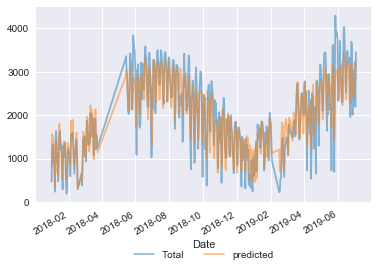

In [16]:
# compare total and predicted bike traffic

# plot only 2018-2019
mask = (daily.index > '12-31-2017')
df_2019 = daily.loc[mask]

df_2019[['Total', 'predicted']].plot(alpha=0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),
          fancybox=True, shadow=True, ncol=5);

In [20]:
# look at coefficients
params = pd.Series(model.coef_, index=X.columns)
params

Mon                  194.278784
Tue                  327.657751
Wed                  293.934535
Thu                  208.158051
Fri                   24.445311
Sat                 -521.452753
Sun                 -527.021680
holiday             -588.173486
daylight_hrs          99.501180
Total Precip (mm)    -17.840525
dry_day              335.350099
Mean Temp (°C)        66.425745
annual               135.192989
dtype: float64

In [21]:
# get uncertainty of coefficients using bootstrap (resampling) method
from sklearn.utils import resample
np.random.seed(1991)
err = np.std([model.fit(*resample(X,y)).coef_
              for i in range(1000)], 0)

print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

                   effect  error
Mon                 194.0   23.0
Tue                 328.0   19.0
Wed                 294.0   17.0
Thu                 208.0   19.0
Fri                  24.0   17.0
Sat                -521.0   20.0
Sun                -527.0   19.0
holiday            -588.0   88.0
daylight_hrs        100.0    6.0
Total Precip (mm)   -18.0    3.0
dry_day             335.0   23.0
Mean Temp (°C)       66.0    3.0
annual              135.0    6.0
